In [1]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData, Table
from sqlalchemy import text
import pandas as pd
import datetime
from sklearn import preprocessing
import numpy as np


from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)


from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\Aldo.Campos\Documents\Particular\Codenation\codenation\estaticos_market.csv',index_col=0)


# Análise da quantidade de dados faltantes
Será utilizado somente as colunas que tenham no mínimo 40% dos dados faltando.

In [7]:
aux = pd.DataFrame({'colunas': df.columns,
                    'tipos': df.dtypes,
                    'percentual_faltante': df.isna().sum() / df.shape[0]})

In [11]:
aux[aux['percentual_faltante']>0.40]


,colunas,tipos,percentual_faltante
vl_total_tancagem,vl_total_tancagem,float64,0.999394
vl_total_veiculos_antt,vl_total_veiculos_antt,float64,0.999619
vl_total_veiculos_leves,vl_total_veiculos_leves,float64,0.933627
vl_total_veiculos_pesados,vl_total_veiculos_pesados,float64,0.933627
qt_art,qt_art,float64,0.985745
vl_total_tancagem_grupo,vl_total_tancagem_grupo,float64,0.996193
vl_total_veiculos_antt_grupo,vl_total_veiculos_antt_grupo,float64,0.999273
vl_potenc_cons_oleo_gas,vl_potenc_cons_oleo_gas,float64,0.992033
de_indicador_telefone,de_indicador_telefone,object,0.905055
vl_frota,vl_frota,float64,0.947674


# Análise das colunas que serão utilizadas

In [36]:
df[['id','sg_uf','qt_filiais', 'fl_rm', 'fl_telefone', 'fl_email', 'fl_st_especial', 
   'idade_empresa_anos', 'de_ramo',
   'de_natureza_juridica', 'fl_matriz', #'dt_situacao',
   'vl_total_veiculos_leves_grupo', 'vl_total_veiculos_pesados_grupo', 'fl_veiculo', 'fl_spa', 'nm_segmento', 
   'nm_divisao', 'setor', 'de_saude_tributaria', 
   'vl_faturamento_estimado_aux',
   'qt_socios', 
   'empsetorcensitariofaixarendapopulacao']].describe()

,qt_filiais,idade_empresa_anos,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo,vl_faturamento_estimado_aux,qt_socios,empsetorcensitariofaixarendapopulacao
count,462298.000000,462298.000000,460371.000000,460371.000000,4.347850e+05,435445.000000,318469.000000
mean,28.737044,9.948677,48.699177,3.591801,8.020911e+05,1.395751,1308.005725
std,468.626094,9.615664,1206.696804,72.600352,3.099979e+07,2.932660,1161.889222
min,0.000000,0.016438,0.000000,0.000000,0.000000e+00,1.000000,100.000000
25%,0.000000,2.756164,0.000000,0.000000,1.648512e+05,1.000000,673.230000
50%,0.000000,6.704110,0.000000,0.000000,2.100000e+05,1.000000,946.680000
75%,0.000000,14.465753,0.000000,0.000000,2.100000e+05,1.000000,1518.080000
max,9647.000000,106.432877,122090.000000,9782.000000,1.454662e+10,246.000000,75093.840000


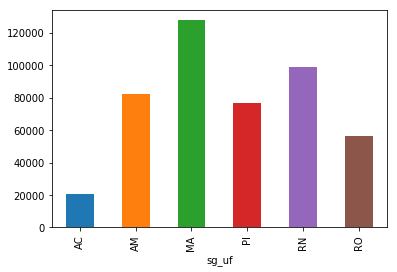

In [43]:
df.groupby('sg_uf')['id'].count().plot(kind='bar')
plt.show()

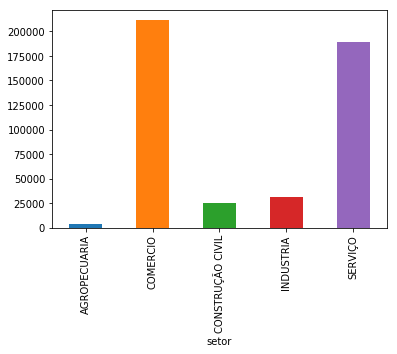

In [45]:
df.groupby('setor')['id'].count().plot(kind='bar')
plt.show()

In [47]:
df.groupby(['fl_rm', 'fl_telefone', 'fl_email', 'fl_st_especial'])[['id']].count()

id
fl_rm fl_telefone fl_email fl_st_especial        
NAO   False       False    False            57756
                           True                25
                  True     False             9158
                           True                 2
      True        False    False            86359
                           True                 2
                  True     False            83465
                           True                12
SIM   False       False    False            49534
                           True                14
                  True     False            10339
                           True                 2
      True        False    False            62533
                           True                 5
                  True     False           103086
                           True                 6

# Preencher as colunas com dados faltantes

Analisando a quantidade de sócios para empresas em que a de_natureza_juridica seja EMPRESARIO INDIVIDUAL, encontramos que
a grande maioria, tem somente 1 sócio. Com isso, atribui o valor 1 para quantidade de sócios dessas empresas, e para
as outras empresa atribui a média da quantidade de sócios.


In [24]:
df[(~df['qt_socios'].isna()) & (df['de_natureza_juridica']=='EMPRESARIO INDIVIDUAL') ].groupby(['de_natureza_juridica','qt_socios']).agg({'id':'count'})

id
de_natureza_juridica  qt_socios        
EMPRESARIO INDIVIDUAL 1.0        295755
                      2.0             1

In [26]:
df.loc[(df['qt_socios'].isna()) & (df['de_natureza_juridica']=='EMPRESARIO INDIVIDUAL'),'qt_socios']=1

df.loc[(df['qt_socios']==1) & (df['de_natureza_juridica']=='EMPRESARIO INDIVIDUAL'),'natureza_juridica_macro']='EMPRESARIO INDIVIDUAL'

df.loc[(df['qt_socios']==1) & (df['de_natureza_juridica']=='EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA'),'natureza_juridica_macro']='EMPRESARIO INDIVIDUAL'

df.loc[(df['qt_socios']==1) & (df['de_natureza_juridica']=='EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES'),'natureza_juridica_macro']='EMPRESARIO INDIVIDUAL'



Estimação do faturamento baseado de_ramo,de_natureza_juridica,sg_uf

In [28]:

df_estimacao_faturamento = df.groupby(['de_ramo','de_natureza_juridica','sg_uf','de_saude_tributaria']).agg({'vl_faturamento_estimado_aux':'mean'}).reset_index()
df_estimacao_faturamento2 = df.groupby(['de_ramo','de_natureza_juridica','sg_uf']).agg({'vl_faturamento_estimado_aux':'mean'}).reset_index()
df_final = df.merge(df_estimacao_faturamento,how='left',on=['de_ramo','de_natureza_juridica','sg_uf','de_saude_tributaria'],suffixes=('','_media'))
df_final['vl_faturamento_estimado_aux_preenchido'] = df_final['vl_faturamento_estimado_aux'].mask(pd.isnull,df_final['vl_faturamento_estimado_aux_media'])

df_final = df_final.merge(df_estimacao_faturamento2,how='left',on=['de_ramo','de_natureza_juridica','sg_uf'],suffixes=('','_media2'))
#df_final['vl_faturamento_estimado_aux_preenchido'] = df_final['vl_faturamento_estimado_aux'].mask(pd.isnull,df_final['vl_faturamento_estimado_aux_media'])
df_final = df_final[['id','sg_uf','qt_filiais', 'fl_rm', 'fl_telefone', 'fl_email', 'fl_st_especial', 
   'idade_empresa_anos', 'de_ramo',
   'de_natureza_juridica', 'fl_matriz', #'dt_situacao',
   'vl_total_veiculos_leves_grupo', 'vl_total_veiculos_pesados_grupo', 'fl_veiculo', 'fl_spa', 'nm_segmento', 
   'nm_divisao', 'setor', 'de_saude_tributaria', 
   'vl_faturamento_estimado_aux',
   'qt_socios', 
   'empsetorcensitariofaixarendapopulacao']]
df_final['qt_socios'] = df_final['qt_socios'].fillna(df[df['qt_socios']>1]['qt_socios'].mean()) 

Para as colunas abaixo, atribui a média para os valores faltantes

In [29]:
df_final['empsetorcensitariofaixarendapopulacao'] = df_final['empsetorcensitariofaixarendapopulacao'].fillna(df_final['empsetorcensitariofaixarendapopulacao'].mean())
df_final['vl_faturamento_estimado_aux'] = df_final['vl_faturamento_estimado_aux'].fillna(df_final['vl_faturamento_estimado_aux'].mean())
df_final['vl_total_veiculos_leves_grupo'] = df_final['vl_total_veiculos_leves_grupo'].fillna(df_final['vl_total_veiculos_leves_grupo'].mean())
df_final['vl_total_veiculos_pesados_grupo'] = df_final['vl_total_veiculos_pesados_grupo'].fillna(df_final['vl_total_veiculos_pesados_grupo'].mean())



# Preencher fl_spa
Comparando as médias de quando o fl_spa está presente e quando ele está nulo, é possível verificar que quando o campo está nulo, é bem parecido com o resultado quando o fl_spa é False, por isso atribui o valor False para os dados faltantes do fl_spa


df_final[(df_final['fl_spa'].isna()) ].agg({'id':'count','qt_socios':'mean','vl_total_veiculos_leves_grupo':'mean',
                                              'vl_total_veiculos_pesados_grupo':'mean'})

In [31]:
df_final.groupby(['fl_spa']).agg({'id':'count','qt_socios':'mean','vl_total_veiculos_leves_grupo':'mean',
                                              'vl_total_veiculos_pesados_grupo':'mean'})


,id,qt_socios,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
fl_spa,,,,
False,460091,1.482347,48.707232,3.513292
True,280,3.355629,35.464286,132.596429


In [32]:
df_final['fl_spa'] = df_final['fl_spa'].fillna(False)

In [35]:
df_final['nm_segmento'] = df_final['nm_segmento'].fillna('OUTROS')
df_final['nm_divisao'] = df_final['nm_divisao'].fillna('OUTROS')
df_final['setor'] = df_final['setor'].fillna('OUTROS')